In [10]:
import sys
sys.path.append('../../../')
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.distributions.normal import Normal
from torch.distributions import kl_divergence
from tifffile import imread
from tqdm import tqdm
import inspect
import glob
from sklearn.cluster import KMeans

In [11]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
patch_size = 64
centre_size = 4
n_channel = 32
hierarchy_level = 3
model_dir = "/group/jug/Sheida/HVAE/v17/model/"

In [12]:
def load_model(dir):
    model = torch.load(dir+"HVAE_best_vae.net")
    return model

In [13]:
def load_losses(dir):
    trainHist=np.load(dir+"train_loss.npy")
    reconHist=np.load(dir+"train_reco_loss.npy")
    klHist=np.load(dir+"train_kl_loss.npy")
    clHist=np.load(dir+"train_cl_loss.npy")
    valHist=np.load(dir+"val_loss.npy")
    return [trainHist, reconHist, klHist, clHist, valHist]

In [14]:
def plot_loss(losses):

    plt.figure(figsize=(18, 18))

    plt.subplot(2,2,1)
    plt.plot(losses['trainHist'],label='training')
    plt.plot(losses['valHist'],label='validation')
    plt.xlabel("epochs")
    plt.ylabel("overall loss")
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(losses['reconHist'],label='training')
    plt.xlabel("epochs")
    plt.ylabel("Inpainting loss")
    plt.legend()

    plt.subplot(2,2,3)
    plt.plot(losses['klHist'],label='training')
    plt.xlabel("epochs")
    plt.ylabel("KL loss")
    plt.legend()

    plt.subplot(2,2,4)
    plt.plot(losses['clHist'],label='training')
    plt.xlabel("epochs")
    plt.ylabel("CL loss")
    plt.legend()
    plt.show()

In [15]:
def get_normalized_tensor(img,model,device):
    test_images = torch.from_numpy(img.copy()).to(device)
    data_mean = model.data_mean
    data_std = model.data_std
    test_images = (test_images-data_mean)/data_std
    return test_images

In [16]:
def load_data(dir):
    return imread(dir)

In [17]:
model = load_model(model_dir)
loss_keys = ['trainHist', 'reconHist', 'klHist', 'clHist', 'valHist']
loss_dict = dict()
losses = load_losses(model_dir)
for index, key in enumerate(loss_keys):
    loss_dict[key] = losses[index]

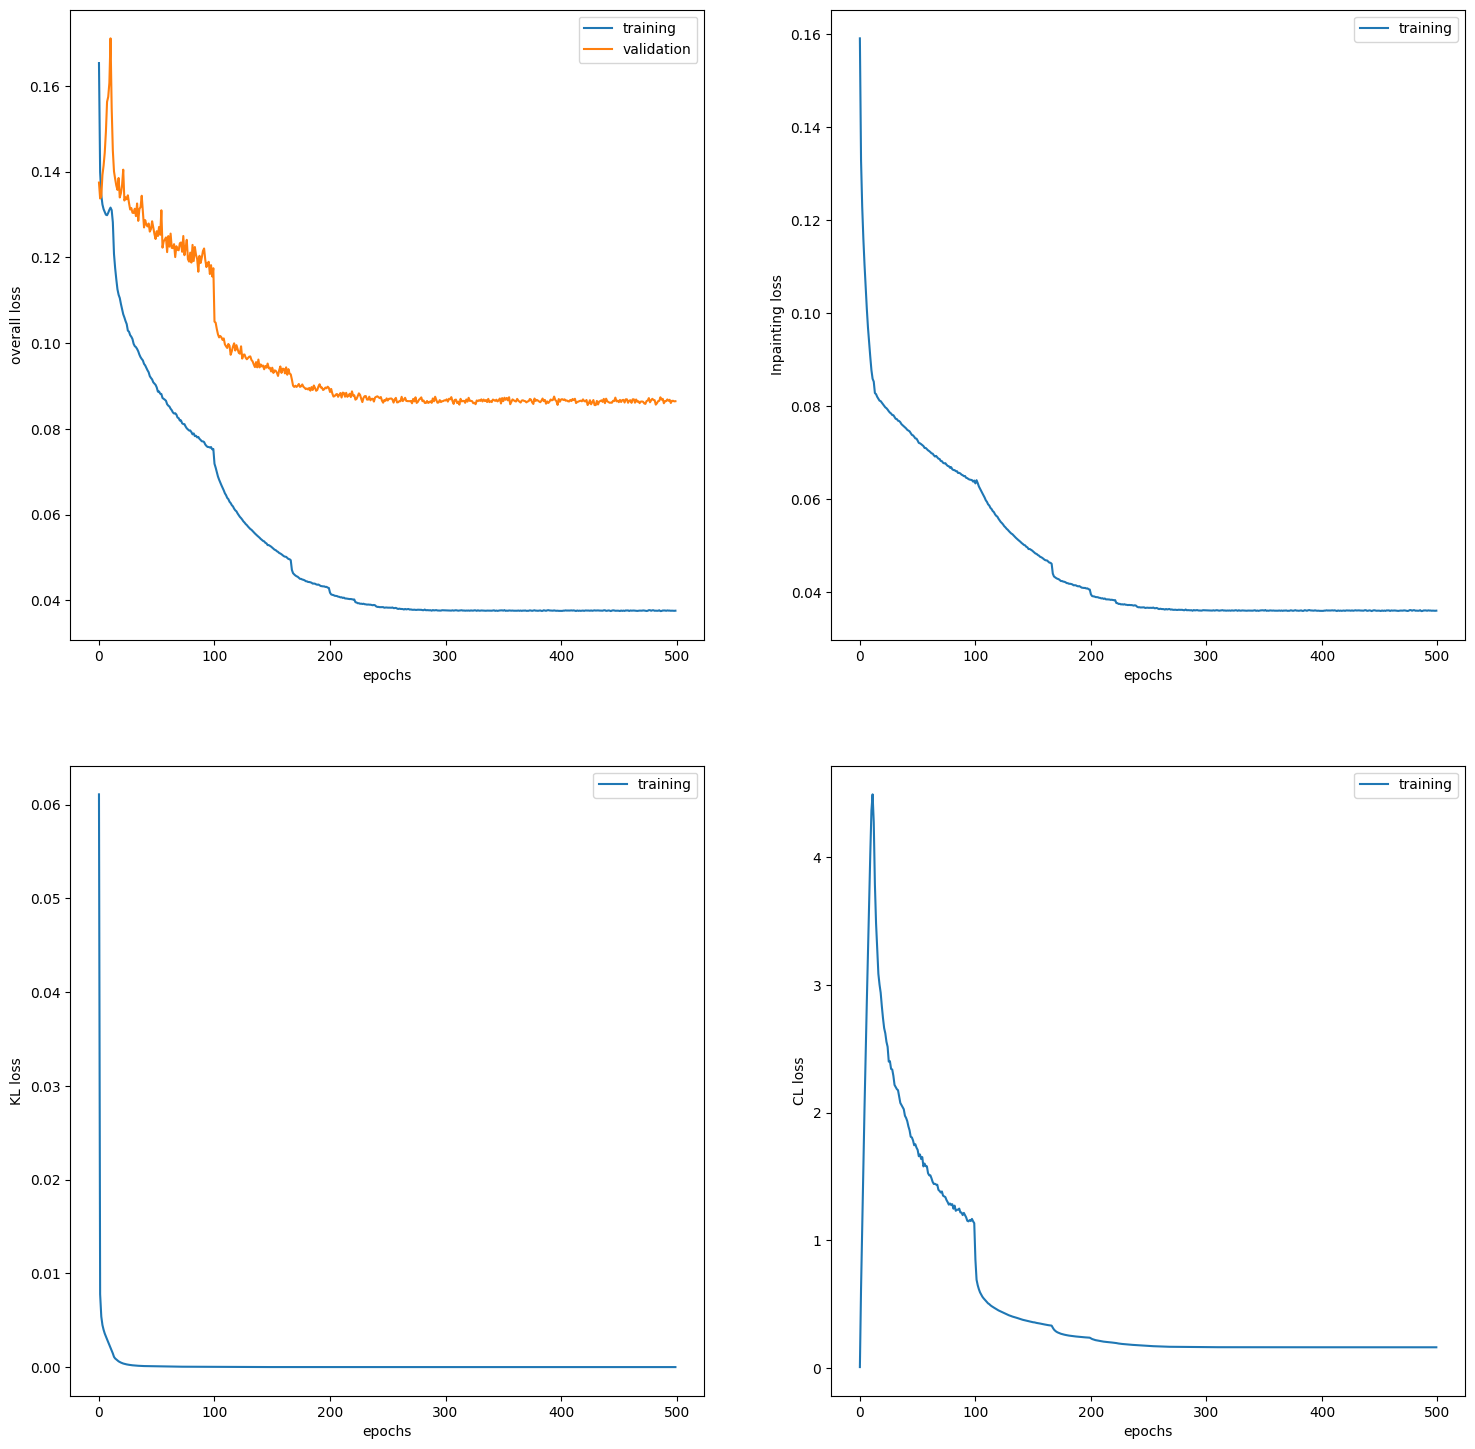

In [18]:
plot_loss(loss_dict)
